In [1]:
import pandas as pd

In [2]:
titanic=pd.read_csv("titanic_train")

In [3]:
titanic.sample

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import seaborn as sns

In [7]:
from matplotlib import pyplot as plt

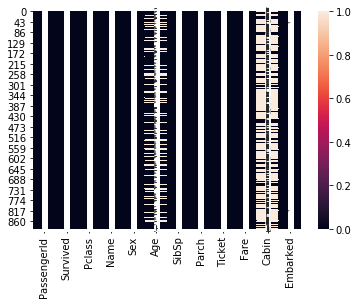

In [8]:
sns.heatmap(titanic.isnull(),annot = True)

In [9]:
plt.show()

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic["Age"].fillna(titanic.groupby("Sex")["Age"].transform("median"), inplace= True)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic["Cabin"]=titanic["Cabin"].str[:1]

In [14]:
titanic["Cabin"].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

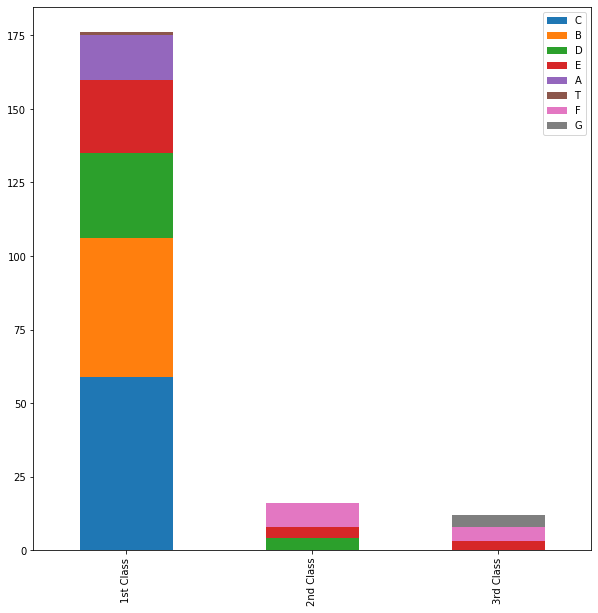

In [15]:
Pclass1 = titanic[titanic['Pclass']==1]['Cabin'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Cabin'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar' , stacked=True, figsize=(10,10))

In [16]:
Cabin_map = {"C" : 0, "B" : 0.2, "D": 0.4, "E": 0.8, "A": 1, "F": 1.2, "G": 1.4, "T": 1.6}

In [17]:
titanic["Cabin"]=titanic["Cabin"].map(Cabin_map)

In [18]:
titanic["Cabin"].fillna(titanic.groupby("Pclass")["Cabin"].transform("median"), inplace= True)

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [20]:
emb_map={"C": 1, "S": 2, "Q":3}
titanic["Embarked"]=titanic["Embarked"].map(emb_map)

In [21]:
titanic["Embarked"].fillna(titanic.groupby("Pclass")["Embarked"].transform("median"), inplace = True)

In [22]:
titanic["Embarked"].value_counts()

2.0    646
1.0    168
3.0     77
Name: Embarked, dtype: int64

In [23]:
def Bar_chart(relation):
    sur = titanic[titanic['Survived'] == 1][relation].value_counts()
    dead = titanic[titanic['Survived'] == 0][relation].value_counts()
    df = pd.DataFrame([sur,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,10))
    

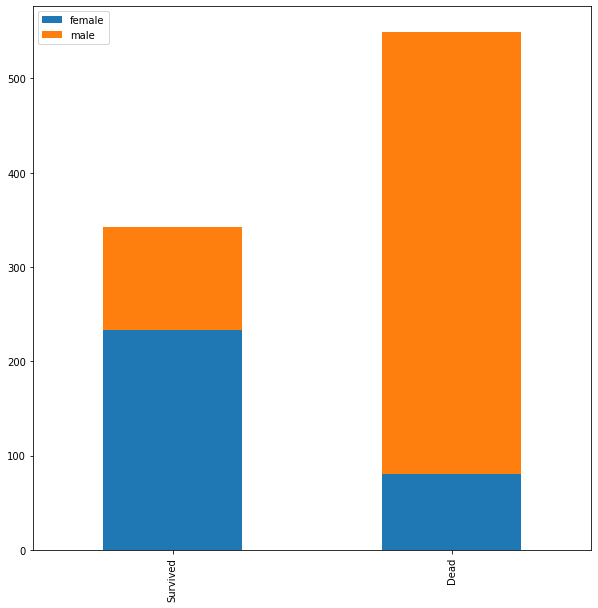

In [24]:
Bar_chart('Sex')

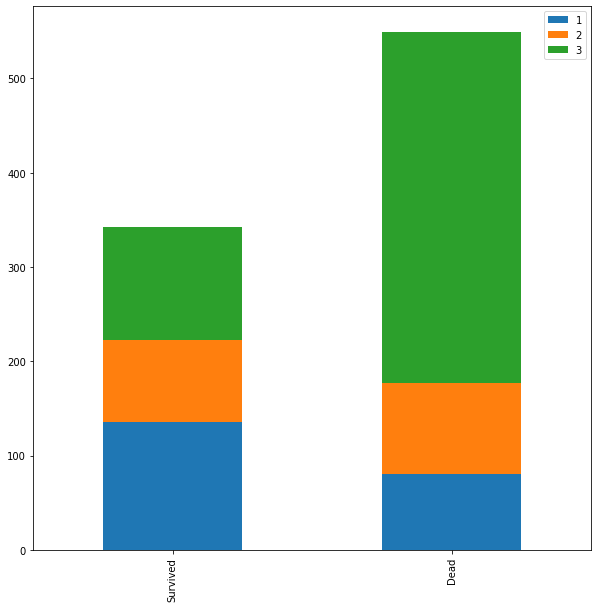

In [25]:
Bar_chart('Pclass')

In [26]:
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [27]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Jonkheer      1
Countess      1
Sir           1
Mme           1
Ms            1
Capt          1
Lady          1
Name: Title, dtype: int64

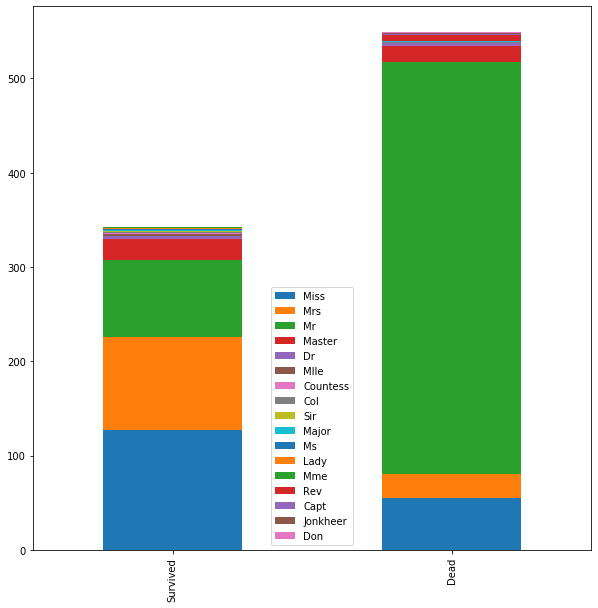

In [28]:
Bar_chart('Title')

In [29]:
Map = {'Miss' : 1,'Mrs': 2, 'Mr': 3, 'Master': 4, 'Dr': 4, 'Mlle': 4, 'Lady':4 , 'Mme': 4, 'Countess': 4, 'Col': 4, 'Ms' : 1, 'Major' : 4, 'Sir' : 3, 'Rev': 4, 'jonkheer': 4 , 'Capt': 4, 'Don': 4}

In [30]:
titanic['Title']= titanic['Title'].map(Map)

In [31]:
titanic['Title'].value_counts()

3.0    518
1.0    183
2.0    125
4.0     64
Name: Title, dtype: int64

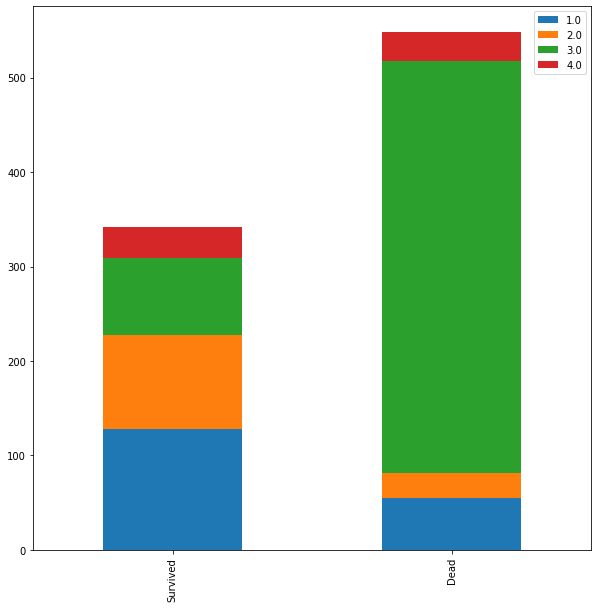

In [35]:
Bar_chart('Title')

In [32]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin          float64
Embarked       float64
Title          float64
dtype: object

In [33]:
copy=titanic

In [34]:
copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.2,2.0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.0,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.2,2.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.0,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1.0,2.0,4.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.2,2.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,1.2,2.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0.0,1.0,3.0


In [36]:
copy=copy.drop(['Name', 'Ticket'], axis=1)

In [68]:
copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            891
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Title            1
dtype: int64

In [41]:
map = {"male" : 1, "female" : 2}
copy['Sex'] = copy["Sex"].map(map)

In [42]:
copy["Sex"]

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [44]:
copy1= titanic

In [45]:
copy1= copy1.drop(["Name","Ticket"], axis=1)

In [46]:
map = {"male" : 1, "female" : 2}
copy1["Sex"]= copy1["Sex"].map(map)

In [47]:
copy1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin          float64
Embarked       float64
Title          float64
dtype: object

In [48]:
copy1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.491821
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin         -1.363691
Embarked      -0.147331
Title         -0.617425
dtype: float64

In [52]:
for col in copy1.columns:
    if copy1.skew().loc[col] > 0.55:
        copy1[col]= np.log1p(copy1[col])

In [51]:
import numpy as np

In [53]:
copy1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.491821
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Cabin         -1.363691
Embarked      -0.147331
Title         -0.617425
dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73010796, -0.78927234,  0.82737724, ...,  0.64607002,
         0.19857166,  0.53485386],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -2.32629689,
        -1.74568493, -0.57994692],
       [-1.72233219,  1.2669898 ,  0.82737724, ...,  0.64607002,
         0.19857166, -1.6947477 ],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  0.64607002,
         0.19857166, -1.6947477 ],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -2.32629689,
        -1.74568493,  0.53485386],
       [ 1.73010796, -0.78927234,  0.82737724, ...,  0.64607002,
         2.14282826,  0.53485386]])

In [84]:
x= copy1
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0.693147,22.0,0.693147,0.000000,2.110213,1.2,2.0,3.0
1,2,1,1,1.098612,38.0,0.693147,0.000000,4.280593,0.0,1.0,2.0
2,3,1,3,1.098612,26.0,0.000000,0.000000,2.188856,1.2,2.0,1.0
3,4,1,1,1.098612,35.0,0.693147,0.000000,3.990834,0.0,2.0,2.0
4,5,0,3,0.693147,35.0,0.000000,0.000000,2.202765,1.2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.693147,27.0,0.000000,0.000000,2.639057,1.0,2.0,4.0
887,888,1,1,1.098612,19.0,0.000000,0.000000,3.433987,0.2,2.0,1.0
888,889,0,3,1.098612,27.0,0.693147,1.098612,3.196630,1.2,2.0,1.0
889,890,1,1,0.693147,26.0,0.000000,0.000000,3.433987,0.0,1.0,3.0


In [96]:
y=copy1['Survived']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


In [67]:
regr= linear_model.LinearRegression()
regr.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [65]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
copy1['Title'].isnull().sum()

1

In [95]:
copy1.dropna(subset=["Title"], inplace=True)

In [76]:
copy1['Title'].isnull().sum()

0

In [77]:
regr= linear_model.LinearRegression()
regr.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [79]:
np.where(copy1.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [80]:
regr= linear_model.LinearRegression()
regr.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [81]:
x

array([[-1.73010796, -0.78927234,  0.82737724, ...,  0.64607002,
         0.19857166,  0.53485386],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -2.32629689,
        -1.74568493, -0.57994692],
       [-1.72233219,  1.2669898 ,  0.82737724, ...,  0.64607002,
         0.19857166, -1.6947477 ],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  0.64607002,
         0.19857166, -1.6947477 ],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -2.32629689,
        -1.74568493,  0.53485386],
       [ 1.73010796, -0.78927234,  0.82737724, ...,  0.64607002,
         2.14282826,  0.53485386]])

In [82]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [83]:
copy1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0.693147,22.0,0.693147,0.000000,2.110213,1.2,2.0,3.0
1,2,1,1,1.098612,38.0,0.693147,0.000000,4.280593,0.0,1.0,2.0
2,3,1,3,1.098612,26.0,0.000000,0.000000,2.188856,1.2,2.0,1.0
3,4,1,1,1.098612,35.0,0.693147,0.000000,3.990834,0.0,2.0,2.0
4,5,0,3,0.693147,35.0,0.000000,0.000000,2.202765,1.2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.693147,27.0,0.000000,0.000000,2.639057,1.0,2.0,4.0
887,888,1,1,1.098612,19.0,0.000000,0.000000,3.433987,0.2,2.0,1.0
888,889,0,3,1.098612,27.0,0.693147,1.098612,3.196630,1.2,2.0,1.0
889,890,1,1,0.693147,26.0,0.000000,0.000000,3.433987,0.0,1.0,3.0


In [85]:
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0.693147,22.0,0.693147,0.000000,2.110213,1.2,2.0,3.0
1,2,1,1,1.098612,38.0,0.693147,0.000000,4.280593,0.0,1.0,2.0
2,3,1,3,1.098612,26.0,0.000000,0.000000,2.188856,1.2,2.0,1.0
3,4,1,1,1.098612,35.0,0.693147,0.000000,3.990834,0.0,2.0,2.0
4,5,0,3,0.693147,35.0,0.000000,0.000000,2.202765,1.2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.693147,27.0,0.000000,0.000000,2.639057,1.0,2.0,4.0
887,888,1,1,1.098612,19.0,0.000000,0.000000,3.433987,0.2,2.0,1.0
888,889,0,3,1.098612,27.0,0.693147,1.098612,3.196630,1.2,2.0,1.0
889,890,1,1,0.693147,26.0,0.000000,0.000000,3.433987,0.0,1.0,3.0


In [88]:
x.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [89]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [93]:
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0.693147,22.0,0.693147,0.000000,2.110213,1.2,2.0,3.0
1,2,1,1,1.098612,38.0,0.693147,0.000000,4.280593,0.0,1.0,2.0
2,3,1,3,1.098612,26.0,0.000000,0.000000,2.188856,1.2,2.0,1.0
3,4,1,1,1.098612,35.0,0.693147,0.000000,3.990834,0.0,2.0,2.0
4,5,0,3,0.693147,35.0,0.000000,0.000000,2.202765,1.2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.693147,27.0,0.000000,0.000000,2.639057,1.0,2.0,4.0
887,888,1,1,1.098612,19.0,0.000000,0.000000,3.433987,0.2,2.0,1.0
888,889,0,3,1.098612,27.0,0.693147,1.098612,3.196630,1.2,2.0,1.0
889,890,1,1,0.693147,26.0,0.000000,0.000000,3.433987,0.0,1.0,3.0


In [94]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [97]:
regr= linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100, test_size=0.20)

In [102]:
max_r_score=0
for r_state in range(42,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state, test_size=0.20)

In [104]:
regr= linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_pred = regr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
r2_scr
    

1.0

In [106]:
if r2_scr > max_r_score:
    max_r_score = r2_scr
   
    

In [107]:
final_r_state = r_state
final_r_state
print("max r2 score corresponding to", final_r_state ,'is',max_r_score )

max r2 score corresponding to 42 is 1.0


In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

1.0

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 99, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [111]:
print('r2_score is:' , r2_score(y_test,y_pred))
print("RMSE is:" , np.sqrt(mean_squared_error(y_test,y_pred)))


r2_score is: 1.0
RMSE is: 2.0145292037271143e-15


In [112]:
from sklearn.externals import joblib
joblib.dump(lreg, 'Titanic_set.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Titanic_set.pkl']